In [659]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

In [585]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [586]:
df = pd.read_csv('final_cleaned_data.csv')

In [587]:
df.head()

,brand_name,model,price,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,processor_brand,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,resolution,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_front_camera,primary_rear_camera,memory_extended_upto,operating_system
0,xiaomi,Xiaomi Redmi 12 5G,11999,75.0,1,1,0,1,snapdragon,8,2.2,4,128.0,1,5000.0,6.79,Ultra HD,90.0,2,1,8.0,50.0,1024.0,Android
1,xiaomi,Xiaomi Redmi 12 5G (6 GB RAM + 128 GB),13499,77.0,1,1,0,1,snapdragon,8,2.2,6,128.0,1,5000.0,6.79,Ultra HD,90.0,2,1,8.0,50.0,1024.0,Android
2,xiaomi,Xiaomi Redmi 12 5G (8GB RAM + 256GB),15499,80.0,1,1,0,1,snapdragon,8,2.2,8,256.0,1,5000.0,6.79,Ultra HD,90.0,2,1,8.0,50.0,1024.0,Android
3,oneplus,OnePlus Nord CE 3 Lite 5G,19999,85.0,1,1,0,0,snapdragon,8,2.2,8,128.0,1,5000.0,6.72,Ultra HD,120.0,3,1,16.0,108.0,1024.0,Android
4,samsung,Samsung Galaxy F34 5G,18999,83.0,1,1,1,0,exynos,8,2.4,6,128.0,1,6000.0,6.50,Ultra HD,120.0,3,1,13.0,50.0,1024.0,Android


In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               696 non-null    object 
 1   model                    696 non-null    object 
 2   price                    696 non-null    int64  
 3   rating                   629 non-null    float64
 4   has_dual_sim             696 non-null    int64  
 5   has_5G                   696 non-null    int64  
 6   has_NFC                  696 non-null    int64  
 7   has_IR_Blaster           696 non-null    int64  
 8   processor_brand          696 non-null    object 
 9   no_of_cores              696 non-null    int64  
 10  processor_speed          696 non-null    float64
 11  ram                      696 non-null    int64  
 12  rom                      696 non-null    float64
 13  fast_charging_available  696 non-null    int64  
 14  battery_capacity         6

In [589]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_dual_sim', 'has_5G',
       'has_NFC', 'has_IR_Blaster', 'processor_brand', 'no_of_cores',
       'processor_speed', 'ram', 'rom', 'fast_charging_available',
       'battery_capacity', 'screen_size', 'resolution', 'refresh_rate',
       'no_of_rear_cameras', 'no_of_front_cameras', 'primary_front_camera',
       'primary_rear_camera', 'memory_extended_upto', 'operating_system'],
      dtype='object')

In [590]:
df.isnull().sum() 

brand_name                  0
model                       0
price                       0
rating                     67
has_dual_sim                0
has_5G                      0
has_NFC                     0
has_IR_Blaster              0
processor_brand             0
no_of_cores                 0
processor_speed             0
ram                         0
rom                         0
fast_charging_available     0
battery_capacity            0
screen_size                 0
resolution                  0
refresh_rate                0
no_of_rear_cameras          0
no_of_front_cameras         0
primary_front_camera        0
primary_rear_camera         0
memory_extended_upto        0
operating_system            0
dtype: int64

In [591]:
#aim to perform EDA is to build a preditive model. 'price' is the target column. so we are finding relation ship of all columns with 'price' column.

## Univariate Analysis

In [592]:
# brand_name-- cat column

df['brand_name'].value_counts()

xiaomi      111
samsung     110
realme       89
vivo         54
poco         38
motorola     34
oppo         34
apple        33
tecno        32
ikall        28
infinix      27
oneplus      24
nokia        23
iqoo         20
lava         17
itel         14
google        4
nothing       4
Name: brand_name, dtype: int64

<Axes: >

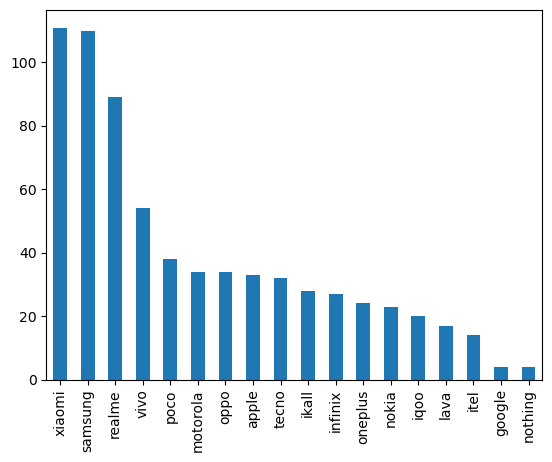

In [593]:
df['brand_name'].value_counts().plot(kind='bar')

<Axes: >

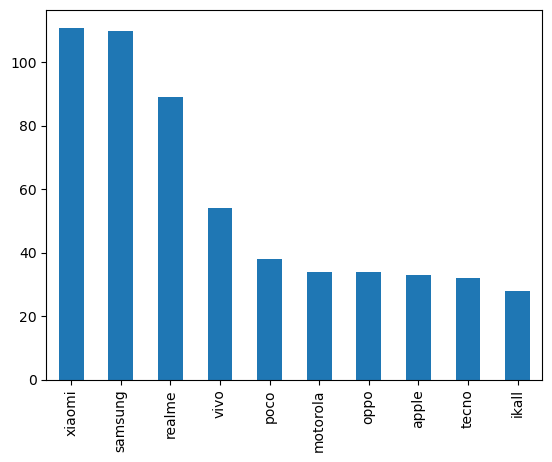

In [594]:
# top 10 brands

df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='brand_name'>

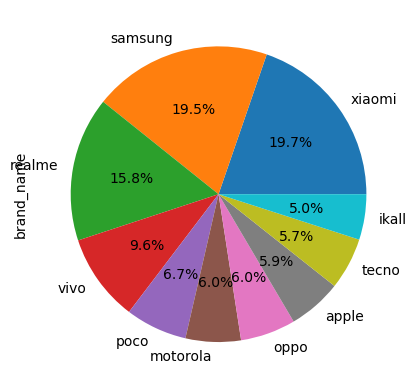

In [595]:
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

In [596]:
# price -- num col-- find descriptive statistics,find distribution,

df['price'].describe()


count       696.000000
mean      25557.008621
std       27649.729512
min        3689.000000
25%        9999.000000
50%       15990.000000
75%       27999.000000
max      184999.000000
Name: price, dtype: float64

In [597]:
# there is difference between mean & median. distribution is not normal. it has to be skewed... there are outliers

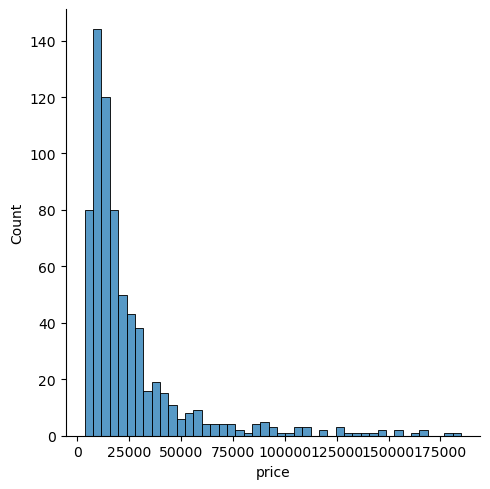

In [598]:
sns.displot(data=df,x='price')

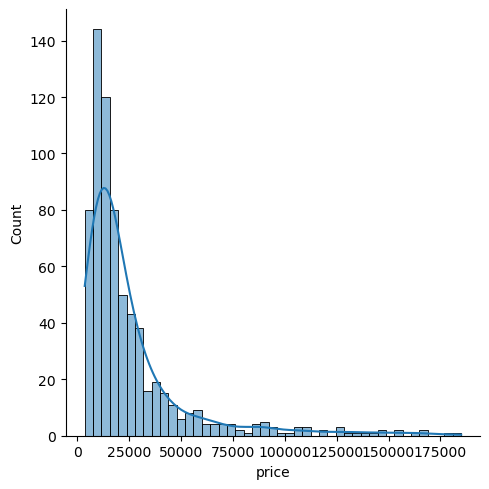

In [599]:
sns.displot(data=df,x='price',kde=True)

In [600]:
# highly skewed. majority of phone is below 25000

In [601]:
df['price'].skew()

2.9157769444591373

<Axes: >

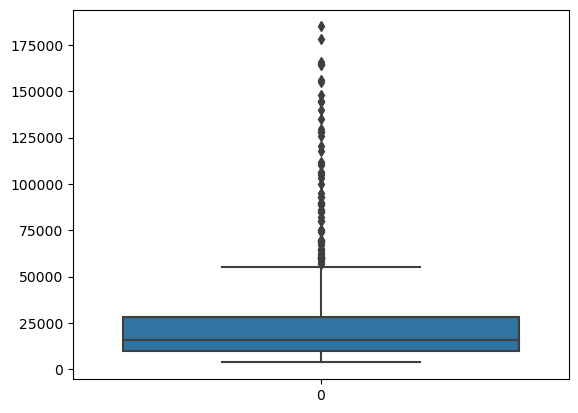

In [602]:
sns.boxplot(df['price'])

In [603]:
df[df['price'] > 100000] #not outliers.. brands justifies the price

,brand_name,model,price,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,processor_brand,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,resolution,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_front_camera,primary_rear_camera,memory_extended_upto,operating_system
28,samsung,Samsung Galaxy S23 Ultra 5G,106500,NaN,1,1,1,0,snapdragon,8,3.36,12,256.0,1,5000.0,6.8,Ultra HD,120.0,4,1,12.0,200.0,0.0,Android
49,apple,Apple iPhone 14 Pro Max,127999,85.0,1,1,1,0,bionic,6,3.46,6,128.0,1,4323.0,6.7,Ultra HD,120.0,3,1,12.0,48.0,0.0,iOS
120,apple,Apple iPhone 14 Pro,117999,84.0,1,1,1,0,bionic,6,3.46,6,128.0,1,3200.0,6.1,Ultra HD,120.0,3,1,12.0,48.0,0.0,iOS
188,samsung,Samsung Galaxy S23 Ultra (12GB RAM + 512GB),120500,NaN,1,1,1,0,snapdragon,8,3.36,12,512.0,1,5000.0,6.8,Ultra HD,120.0,4,1,12.0,200.0,0.0,Android
230,apple,Apple iPhone 14 Pro Max (1TB),177999,87.0,1,1,1,0,bionic,6,3.46,6,1000.0,1,4323.0,6.7,Ultra HD,120.0,3,1,12.0,48.0,0.0,iOS
239,apple,Apple iPhone 14 Pro Max (256GB),143990,86.0,1,1,1,0,bionic,6,3.46,6,256.0,1,4323.0,6.7,Ultra HD,120.0,3,1,12.0,48.0,0.0,iOS
292,samsung,Samsung Galaxy S21 Ultra,105999,NaN,1,1,1,0,exynos,8,2.90,12,256.0,1,5000.0,6.8,Ultra HD,120.0,4,1,40.0,108.0,0.0,Android
295,samsung,Samsung Galaxy Z Fold 5 (12GB RAM + 512GB),164999,NaN,1,1,1,0,snapdragon,8,3.36,12,512.0,1,4400.0,7.6,Ultra HD,120.0,3,2,10.0,50.0,0.0,Android
308,samsung,Samsung Galaxy Z Fold 5 (12GB RAM + 1TB),184999,NaN,1,1,1,0,snapdragon,8,3.36,12,1000.0,1,4400.0,7.6,Ultra HD,120.0,3,2,10.0,50.0,0.0,Android
333,samsung,Samsung Galaxy Z Fold 4,154999,NaN,1,1,1,0,snapdragon,8,3.20,12,256.0,1,4400.0,7.6,Ultra HD,120.0,3,2,10.0,50.0,0.0,Android


In [604]:
#rating

df['rating'].describe() 

count    629.000000
mean      77.408585
std        8.114624
min       60.000000
25%       71.000000
50%       79.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

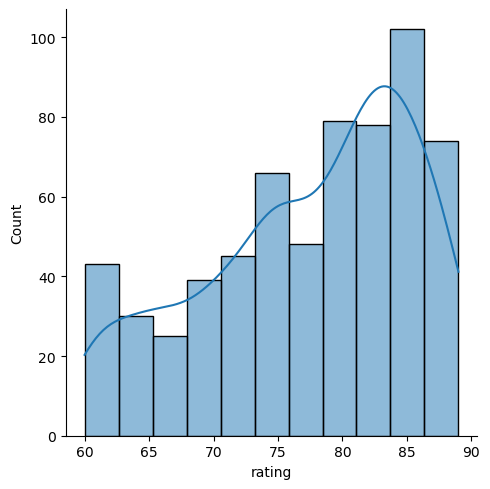

In [605]:
sns.displot(data=df,x='rating',kde=True)

In [606]:
df['rating'].skew() #near to normal

-0.532757011535017

<Axes: >

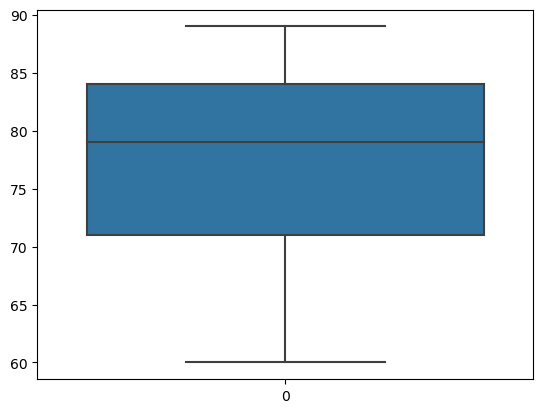

In [607]:
sns.boxplot(df['rating']) #no outliers

In [608]:
# 67 missing values in rating

#KNN imputer..only works for numerical columns.. so select num cols

df.select_dtypes(include=['int64','float64'])

,price,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_front_camera,primary_rear_camera,memory_extended_upto
0,11999,75.0,1,1,0,1,8,2.20,4,128.0,1,5000.0,6.79,90.0,2,1,8.0,50.0,1024.0
1,13499,77.0,1,1,0,1,8,2.20,6,128.0,1,5000.0,6.79,90.0,2,1,8.0,50.0,1024.0
2,15499,80.0,1,1,0,1,8,2.20,8,256.0,1,5000.0,6.79,90.0,2,1,8.0,50.0,1024.0
3,19999,85.0,1,1,0,0,8,2.20,8,128.0,1,5000.0,6.72,120.0,3,1,16.0,108.0,1024.0
4,18999,83.0,1,1,1,0,8,2.40,6,128.0,1,6000.0,6.50,120.0,3,1,13.0,50.0,1024.0
5,26999,84.0,1,1,1,1,8,2.70,8,128.0,1,5000.0,6.70,120.0,3,1,16.0,50.0,1024.0
6,13999,78.0,1,1,0,0,8,2.20,6,128.0,1,5000.0,6.58,60.0,2,1,8.0,50.0,1024.0
7,9999,75.0,1,0,0,0,8,1.82,4,128.0,1,5000.0,6.74,90.0,2,1,8.0,108.0,2048.0
8,29999,87.0,1,1,1,0,8,2.60,8,256.0,1,4400.0,6.55,144.0,2,1,32.0,50.0,0.0
9,32999,88.0,1,1,1,1,8,2.60,8,256.0,1,5000.0,6.70,120.0,3,1,32.0,64.0,128.0


In [609]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [610]:
x_df.shape

(696, 18)

In [611]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [612]:
x_df_values = imputer.fit_transform(x_df)

In [613]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns) #new df with no missing values

In [614]:
x_df['price'] = df['price']

In [615]:
x_df['rating'].value_counts()

75.0    44
82.0    43
84.0    41
83.0    35
86.0    32
85.0    32
89.0    28
80.0    27
79.0    27
88.0    26
81.0    25
87.0    24
74.0    23
71.0    22
61.0    21
77.0    21
70.0    19
66.0    18
78.0    15
65.0    14
62.0    13
64.0    12
72.0    12
73.0    12
76.0    12
68.0    11
60.0    11
69.0    11
67.2     9
67.8     9
67.0     7
61.8     6
63.0     4
85.8     3
60.8     3
85.6     3
69.4     3
86.2     3
63.2     3
71.4     2
69.8     1
61.4     1
86.4     1
62.2     1
60.2     1
86.8     1
64.4     1
84.4     1
87.8     1
66.2     1
Name: rating, dtype: int64

In [616]:
x_df['brand_name'] = df['brand_name']

In [617]:
x_df['model'] = df['model']

In [618]:
x_df['processor_brand'] = df['processor_brand']

In [619]:
x_df['resolution'] = df['resolution']

In [620]:
x_df['operating_system'] = df['operating_system']

In [621]:
x_df

,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_front_camera,primary_rear_camera,memory_extended_upto,price,brand_name,model,processor_brand,resolution,operating_system
0,75.0,1.0,1.0,0.0,1.0,8.0,2.20,4.0,128.0,1.0,5000.0,6.79,90.0,2.0,1.0,8.0,50.0,1024.0,11999,xiaomi,Xiaomi Redmi 12 5G,snapdragon,Ultra HD,Android
1,77.0,1.0,1.0,0.0,1.0,8.0,2.20,6.0,128.0,1.0,5000.0,6.79,90.0,2.0,1.0,8.0,50.0,1024.0,13499,xiaomi,Xiaomi Redmi 12 5G (6 GB RAM + 128 GB),snapdragon,Ultra HD,Android
2,80.0,1.0,1.0,0.0,1.0,8.0,2.20,8.0,256.0,1.0,5000.0,6.79,90.0,2.0,1.0,8.0,50.0,1024.0,15499,xiaomi,Xiaomi Redmi 12 5G (8GB RAM + 256GB),snapdragon,Ultra HD,Android
3,85.0,1.0,1.0,0.0,0.0,8.0,2.20,8.0,128.0,1.0,5000.0,6.72,120.0,3.0,1.0,16.0,108.0,1024.0,19999,oneplus,OnePlus Nord CE 3 Lite 5G,snapdragon,Ultra HD,Android
4,83.0,1.0,1.0,1.0,0.0,8.0,2.40,6.0,128.0,1.0,6000.0,6.50,120.0,3.0,1.0,13.0,50.0,1024.0,18999,samsung,Samsung Galaxy F34 5G,exynos,Ultra HD,Android
5,84.0,1.0,1.0,1.0,1.0,8.0,2.70,8.0,128.0,1.0,5000.0,6.70,120.0,3.0,1.0,16.0,50.0,1024.0,26999,oneplus,OnePlus Nord CE 3 5G,snapdragon,Ultra HD,Android
6,78.0,1.0,1.0,0.0,0.0,8.0,2.20,6.0,128.0,1.0,5000.0,6.58,60.0,2.0,1.0,8.0,50.0,1024.0,13999,vivo,Vivo T2x 5G (6GB RAM + 128GB),mediatek,Ultra HD,Android
7,75.0,1.0,0.0,0.0,0.0,8.0,1.82,4.0,128.0,1.0,5000.0,6.74,90.0,2.0,1.0,8.0,108.0,2048.0,9999,realme,Realme C53,unisoc,Ultra HD,Android
8,87.0,1.0,1.0,1.0,0.0,8.0,2.60,8.0,256.0,1.0,4400.0,6.55,144.0,2.0,1.0,32.0,50.0,0.0,29999,motorola,Motorola Edge 40 5G,mediatek,Ultra HD,Android
9,88.0,1.0,1.0,1.0,1.0,8.0,2.60,8.0,256.0,1.0,5000.0,6.70,120.0,3.0,1.0,32.0,64.0,128.0,32999,oppo,OPPO Reno 10,mediatek,Ultra HD,Android


In [622]:
desired_order = ['brand_name', 'model', 'rating','has_dual_sim','has_5G','has_NFC','has_IR_Blaster','processor_brand','no_of_cores','processor_speed',
                'ram','rom','fast_charging_available','battery_capacity','screen_size','resolution','refresh_rate','no_of_rear_cameras',
                'no_of_front_cameras','primary_rear_camera','primary_front_camera','memory_extended_upto','operating_system','price']

In [623]:
df = x_df[desired_order]

In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               696 non-null    object 
 1   model                    696 non-null    object 
 2   rating                   696 non-null    float64
 3   has_dual_sim             696 non-null    float64
 4   has_5G                   696 non-null    float64
 5   has_NFC                  696 non-null    float64
 6   has_IR_Blaster           696 non-null    float64
 7   processor_brand          696 non-null    object 
 8   no_of_cores              696 non-null    float64
 9   processor_speed          696 non-null    float64
 10  ram                      696 non-null    float64
 11  rom                      696 non-null    float64
 12  fast_charging_available  696 non-null    float64
 13  battery_capacity         696 non-null    float64
 14  screen_size              6

In [625]:
df['rating'] = round(df['rating'])

In [626]:
df['rating'].value_counts()

75.0    44
82.0    43
84.0    42
86.0    42
83.0    35
85.0    32
89.0    28
80.0    27
79.0    27
88.0    27
61.0    25
81.0    25
87.0    25
71.0    24
74.0    23
77.0    21
62.0    20
70.0    20
68.0    20
66.0    19
67.0    16
78.0    15
65.0    14
69.0    14
64.0    13
72.0    12
73.0    12
60.0    12
76.0    12
63.0     7
Name: rating, dtype: int64

In [627]:
df['rating'] = df['rating'].astype(np.int64)

In [628]:
df['has_dual_sim'] = df['has_dual_sim'].astype(np.int64)

In [629]:
df['has_5G'] = df['has_5G'].astype(np.int64)

In [630]:
df['has_NFC'] = df['has_NFC'].astype(np.int64)

In [631]:
df['has_IR_Blaster'] = df['has_IR_Blaster'].astype(np.int64)

In [632]:
df['no_of_cores'] = df['no_of_cores'].astype(np.int64)

In [633]:
df['ram'] = df['ram'].astype(np.int64)

In [634]:
df['rom'] = df['rom'].astype(np.int64)

In [635]:
df['fast_charging_available'] = df['fast_charging_available'].astype(np.int64)

In [636]:
df['battery_capacity'] = df['battery_capacity'].astype(np.int64)

In [637]:
df['refresh_rate'] = df['refresh_rate'].astype(np.int64)

In [638]:
df['no_of_rear_cameras'] = df['no_of_rear_cameras'].astype(np.int64)

In [639]:
df['no_of_front_cameras'] = df['no_of_front_cameras'].astype(np.int64)

In [640]:
df['primary_rear_camera'] = df['primary_rear_camera'].astype(np.int64)

In [641]:
df['primary_front_camera'] = df['primary_front_camera'].astype(np.int64)

In [642]:
df['memory_extended_upto'] = df['memory_extended_upto'].astype(np.int64)

In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               696 non-null    object 
 1   model                    696 non-null    object 
 2   rating                   696 non-null    int64  
 3   has_dual_sim             696 non-null    int64  
 4   has_5G                   696 non-null    int64  
 5   has_NFC                  696 non-null    int64  
 6   has_IR_Blaster           696 non-null    int64  
 7   processor_brand          696 non-null    object 
 8   no_of_cores              696 non-null    int64  
 9   processor_speed          696 non-null    float64
 10  ram                      696 non-null    int64  
 11  rom                      696 non-null    int64  
 12  fast_charging_available  696 non-null    int64  
 13  battery_capacity         696 non-null    int64  
 14  screen_size              6

In [644]:
df.to_csv('final_data_for_modelling.csv',index=False)

In [645]:
df.head()

,brand_name,model,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,processor_brand,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,resolution,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_rear_camera,primary_front_camera,memory_extended_upto,operating_system,price
0,xiaomi,Xiaomi Redmi 12 5G,75,1,1,0,1,snapdragon,8,2.2,4,128,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,11999
1,xiaomi,Xiaomi Redmi 12 5G (6 GB RAM + 128 GB),77,1,1,0,1,snapdragon,8,2.2,6,128,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,13499
2,xiaomi,Xiaomi Redmi 12 5G (8GB RAM + 256GB),80,1,1,0,1,snapdragon,8,2.2,8,256,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,15499
3,oneplus,OnePlus Nord CE 3 Lite 5G,85,1,1,0,0,snapdragon,8,2.2,8,128,1,5000,6.72,Ultra HD,120,3,1,108,16,1024,Android,19999
4,samsung,Samsung Galaxy F34 5G,83,1,1,1,0,exynos,8,2.4,6,128,1,6000,6.50,Ultra HD,120,3,1,50,13,1024,Android,18999


In [646]:
#has_dual_sim

df['has_dual_sim'].value_counts()

1    692
0      4
Name: has_dual_sim, dtype: int64

<Axes: ylabel='has_dual_sim'>

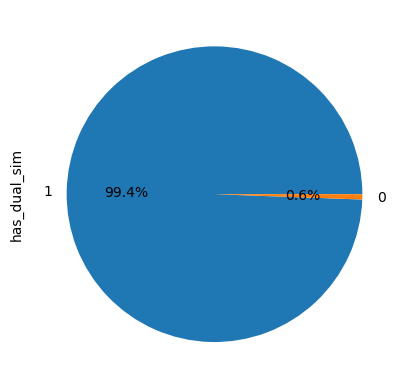

In [647]:
df['has_dual_sim'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [648]:
# has_5G-- cat col

df['has_5G'].value_counts()

0    373
1    323
Name: has_5G, dtype: int64

<Axes: ylabel='has_5G'>

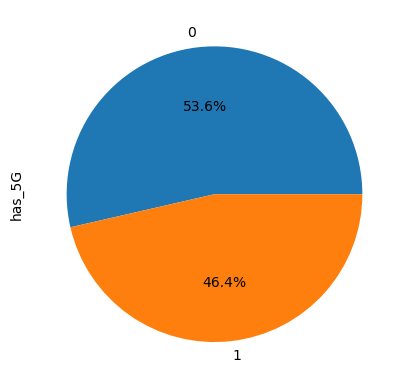

In [649]:
df['has_5G'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [650]:
#has_nfc

df['has_NFC'].value_counts()

0    485
1    211
Name: has_NFC, dtype: int64

<Axes: ylabel='has_NFC'>

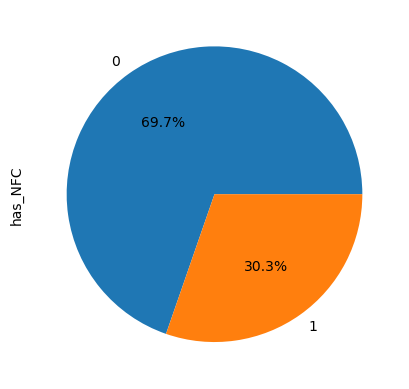

In [651]:
df['has_NFC'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [652]:
df[df['has_NFC']==True]['brand_name'].value_counts()

samsung     58
apple       33
oneplus     21
motorola    18
realme      18
tecno       13
oppo        11
xiaomi      10
iqoo         7
infinix      5
vivo         5
google       4
nothing      4
poco         3
nokia        1
Name: brand_name, dtype: int64

In [653]:
# has_IRblaster

df['has_IR_Blaster'].value_counts()

0    569
1    127
Name: has_IR_Blaster, dtype: int64

<Axes: ylabel='has_IR_Blaster'>

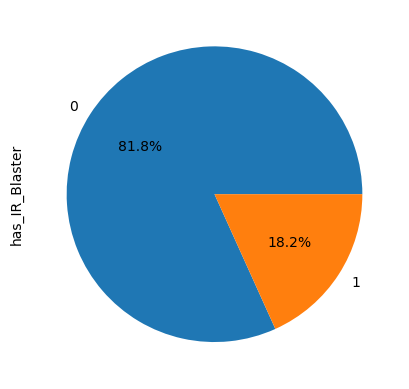

In [654]:
df['has_IR_Blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [655]:
df[df['has_IR_Blaster']==True]['brand_name'].value_counts()

xiaomi     82
poco       27
oneplus     6
iqoo        5
oppo        4
vivo        3
Name: brand_name, dtype: int64

<Axes: ylabel='processor_brand'>

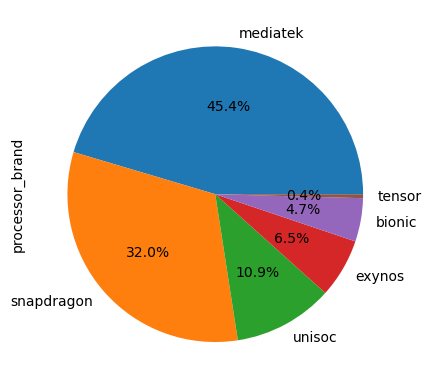

In [656]:
# all categorical columns
df['processor_brand'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='no_of_cores'>

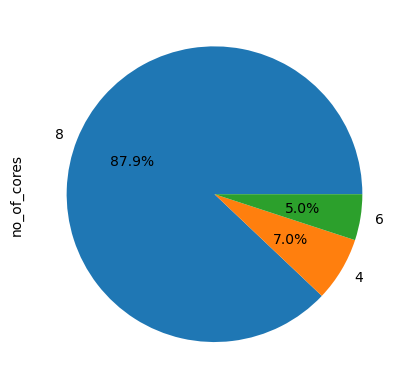

In [525]:
df['no_of_cores'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='ram'>

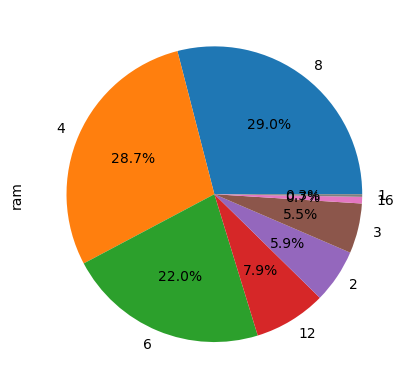

In [526]:
df['ram'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [527]:
df['rom'].value_counts()

128     311
64      180
256     119
32       59
512      15
1000      6
16        5
8         1
Name: rom, dtype: int64

<Axes: ylabel='rom'>

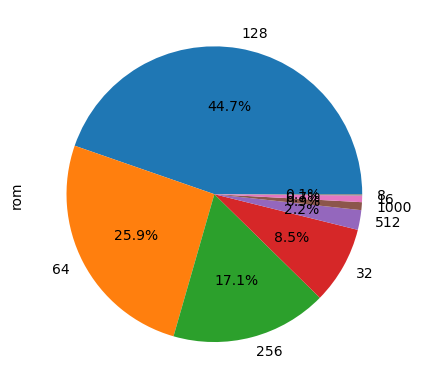

In [528]:
df['rom'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='refresh_rate'>

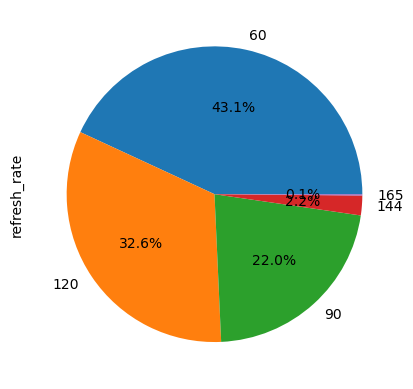

In [529]:
df['refresh_rate'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='no_of_rear_cameras'>

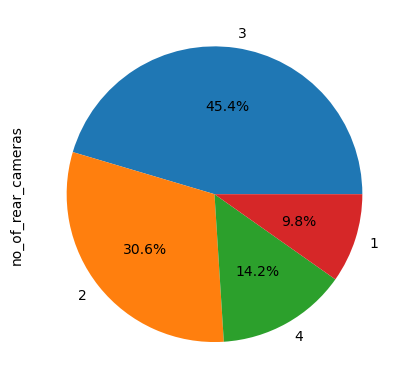

In [530]:
df['no_of_rear_cameras'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='no_of_front_cameras'>

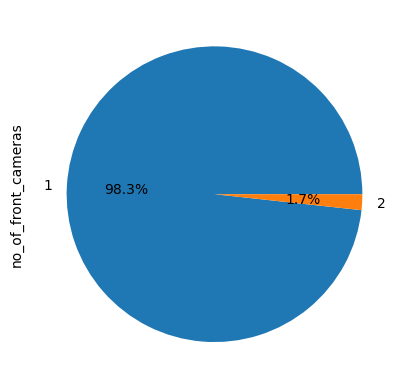

In [531]:
df['no_of_front_cameras'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='operating_system'>

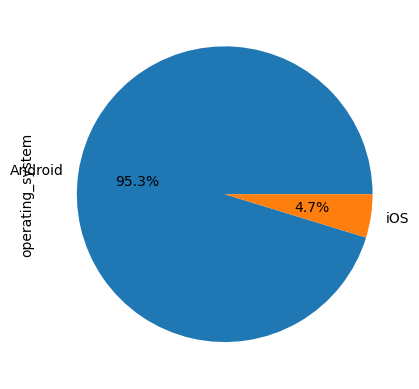

In [533]:
df['operating_system'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='memory_extended_upto'>

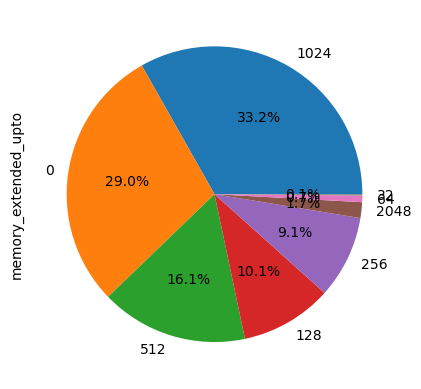

In [534]:
df['memory_extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [535]:
# num columns

df.select_dtypes(include=['int64','float64'])
    

,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_rear_camera,primary_front_camera,memory_extended_upto,price
0,75,1,1,0,1,8,2.20,4,128,1,5000,6.79,90,2,1,50,8,1024,11999
1,77,1,1,0,1,8,2.20,6,128,1,5000,6.79,90,2,1,50,8,1024,13499
2,80,1,1,0,1,8,2.20,8,256,1,5000,6.79,90,2,1,50,8,1024,15499
3,85,1,1,0,0,8,2.20,8,128,1,5000,6.72,120,3,1,108,16,1024,19999
4,83,1,1,1,0,8,2.40,6,128,1,6000,6.50,120,3,1,50,13,1024,18999
5,84,1,1,1,1,8,2.70,8,128,1,5000,6.70,120,3,1,50,16,1024,26999
6,78,1,1,0,0,8,2.20,6,128,1,5000,6.58,60,2,1,50,8,1024,13999
7,75,1,0,0,0,8,1.82,4,128,1,5000,6.74,90,2,1,108,8,2048,9999
8,87,1,1,1,0,8,2.60,8,256,1,4400,6.55,144,2,1,50,32,0,29999
9,88,1,1,1,1,8,2.60,8,256,1,5000,6.70,120,3,1,64,32,128,32999


In [536]:
numerical_columns = df.select_dtypes(include=['int64','float64']).iloc[:,[2,5,6,10,11,13]].columns

In [537]:
def plot_graphs(column_name):
    
    sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
    sns.catplot(kind='box',data=df,x=column_name)

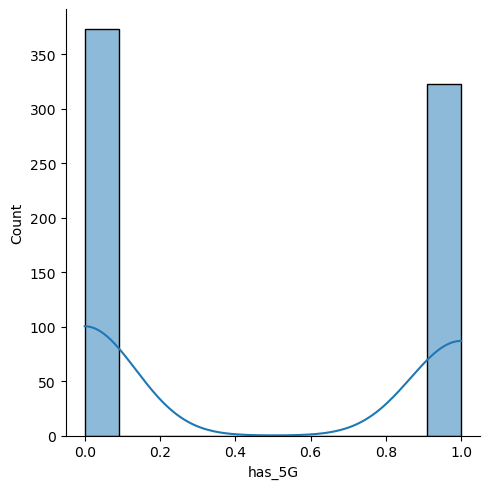

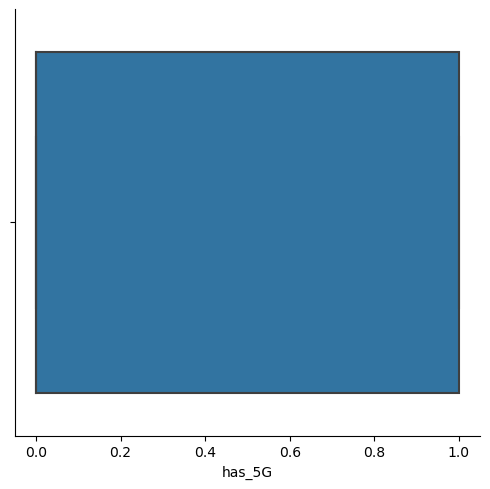

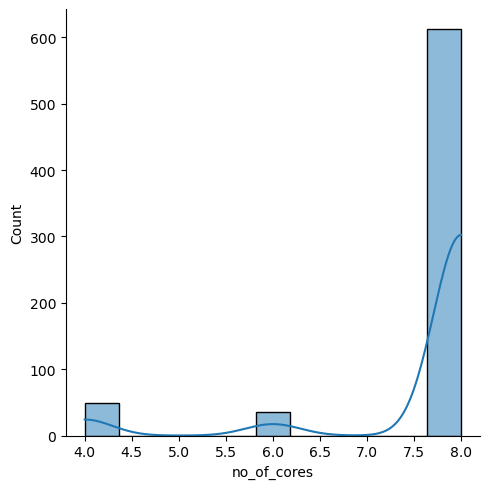

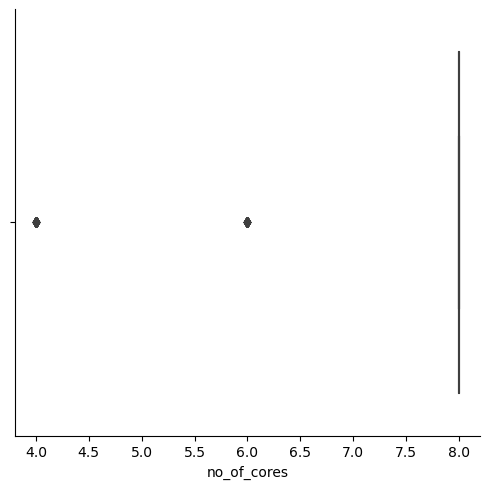

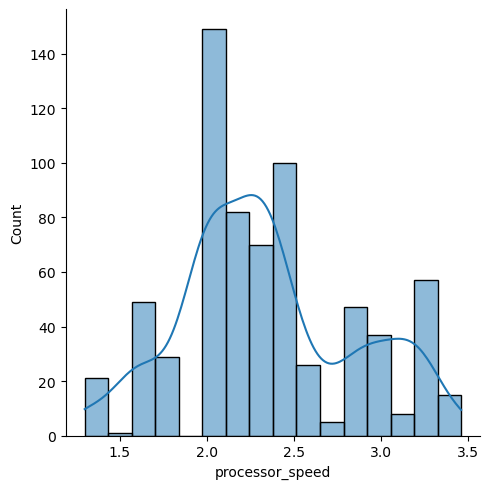

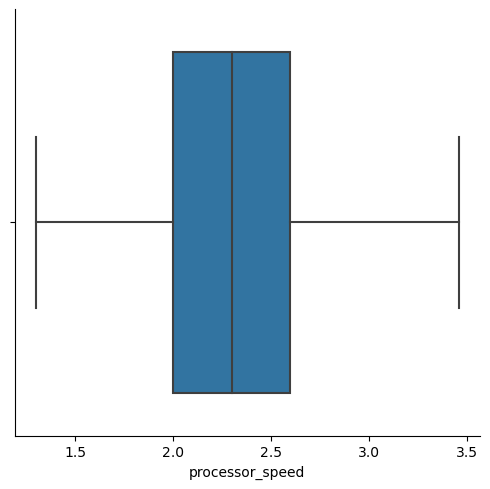

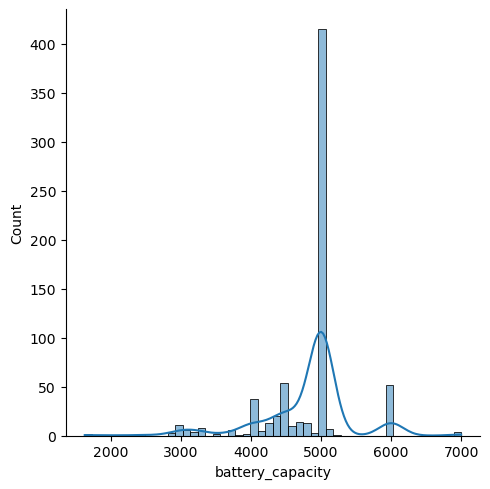

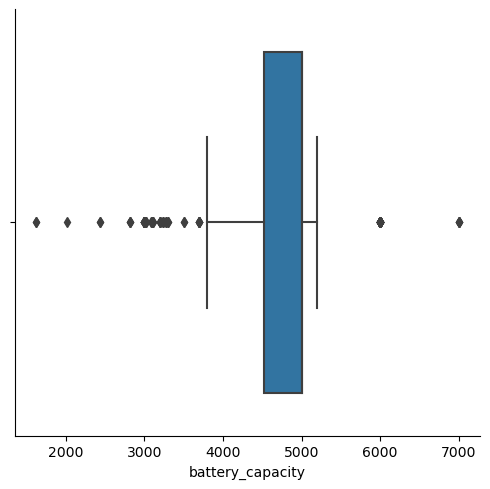

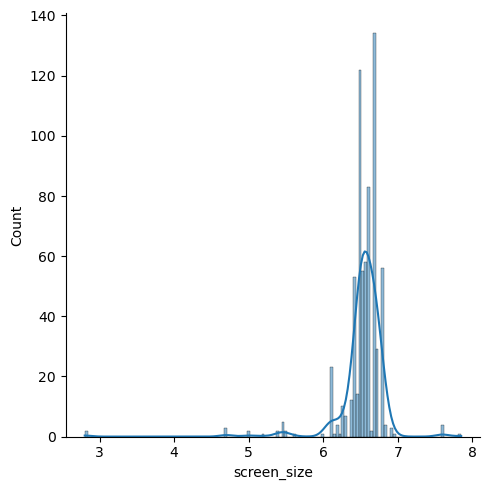

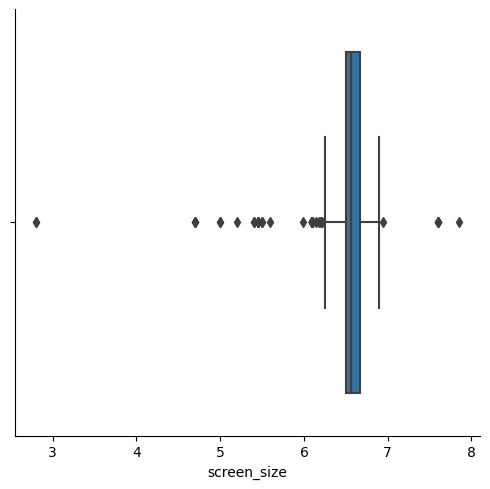

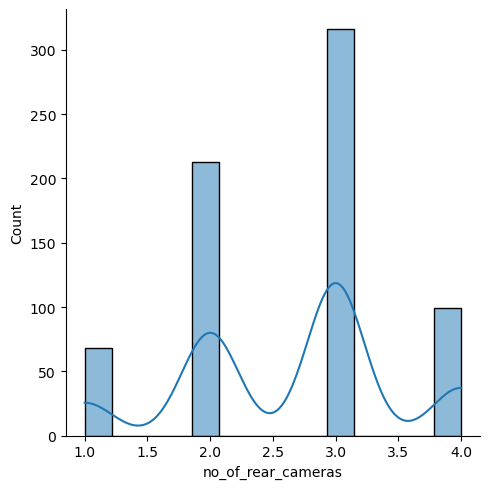

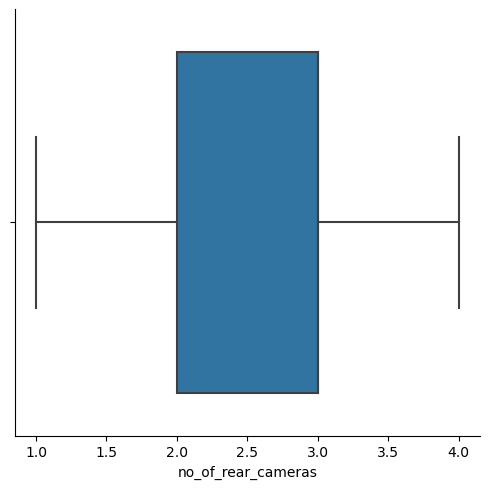

In [538]:
for col in numerical_columns:
    plot_graphs(col)

In [539]:
#write conclusions for each columns

## Bivariate Analysis

In [540]:
# we are going to find relation of every column with 'price' column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'xiaomi'),
  Text(1, 0, 'oneplus'),
  Text(2, 0, 'samsung'),
  Text(3, 0, 'vivo'),
  Text(4, 0, 'realme'),
  Text(5, 0, 'motorola'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'infinix'),
  Text(8, 0, 'apple'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'poco'),
  Text(11, 0, 'lava'),
  Text(12, 0, 'tecno'),
  Text(13, 0, 'google'),
  Text(14, 0, 'nothing'),
  Text(15, 0, 'itel'),
  Text(16, 0, 'ikall'),
  Text(17, 0, 'nokia')])

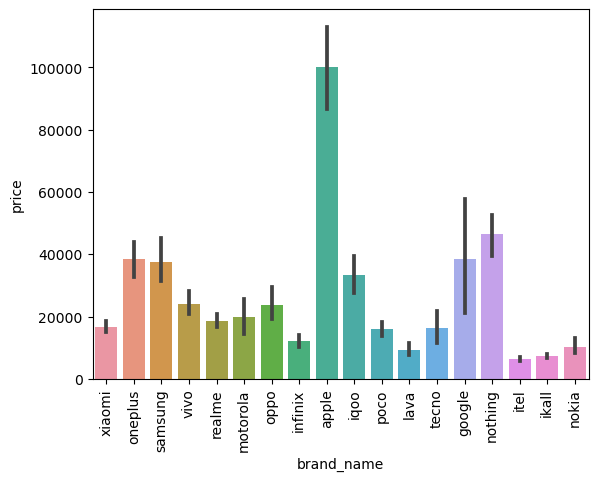

In [541]:
sns.barplot(data=df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [542]:
df.groupby('brand_name').count()['model']

brand_name
apple        33
google        4
ikall        28
infinix      27
iqoo         20
itel         14
lava         17
motorola     34
nokia        23
nothing       4
oneplus      24
oppo         34
poco         38
realme       89
samsung     110
tecno        32
vivo         54
xiaomi      111
Name: model, dtype: int64

In [543]:
x = df.groupby('brand_name').count()['model']

In [544]:
x[x>10] #brands with atleast 10 phones

brand_name
apple        33
ikall        28
infinix      27
iqoo         20
itel         14
lava         17
motorola     34
nokia        23
oneplus      24
oppo         34
poco         38
realme       89
samsung     110
tecno        32
vivo         54
xiaomi      111
Name: model, dtype: int64

In [545]:
x[x>10].index

Index(['apple', 'ikall', 'infinix', 'iqoo', 'itel', 'lava', 'motorola',
       'nokia', 'oneplus', 'oppo', 'poco', 'realme', 'samsung', 'tecno',
       'vivo', 'xiaomi'],
      dtype='object', name='brand_name')

In [546]:
df['brand_name'].isin(x[x>10].index)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76     False

In [547]:
temp_df = df[df['brand_name'].isin(x[x>10].index)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'xiaomi'),
  Text(1, 0, 'oneplus'),
  Text(2, 0, 'samsung'),
  Text(3, 0, 'vivo'),
  Text(4, 0, 'realme'),
  Text(5, 0, 'motorola'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'infinix'),
  Text(8, 0, 'apple'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'poco'),
  Text(11, 0, 'lava'),
  Text(12, 0, 'tecno'),
  Text(13, 0, 'itel'),
  Text(14, 0, 'ikall'),
  Text(15, 0, 'nokia')])

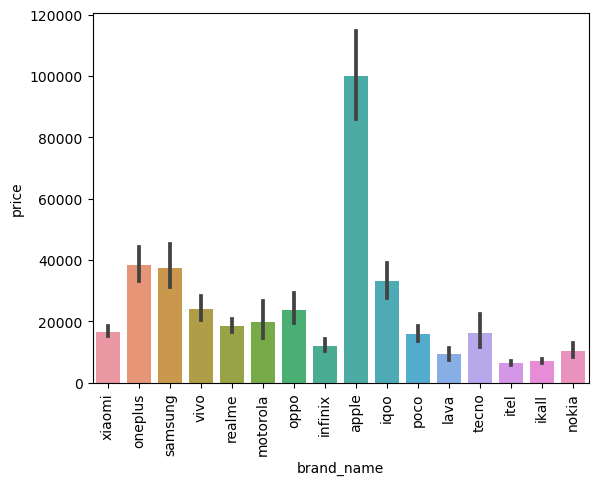

In [548]:
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [549]:
df.head()

,brand_name,model,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,processor_brand,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,resolution,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_rear_camera,primary_front_camera,memory_extended_upto,operating_system,price
0,xiaomi,Xiaomi Redmi 12 5G,75,1,1,0,1,snapdragon,8,2.2,4,128,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,11999
1,xiaomi,Xiaomi Redmi 12 5G (6 GB RAM + 128 GB),77,1,1,0,1,snapdragon,8,2.2,6,128,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,13499
2,xiaomi,Xiaomi Redmi 12 5G (8GB RAM + 256GB),80,1,1,0,1,snapdragon,8,2.2,8,256,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,15499
3,oneplus,OnePlus Nord CE 3 Lite 5G,85,1,1,0,0,snapdragon,8,2.2,8,128,1,5000,6.72,Ultra HD,120,3,1,108,16,1024,Android,19999
4,samsung,Samsung Galaxy F34 5G,83,1,1,1,0,exynos,8,2.4,6,128,1,6000,6.50,Ultra HD,120,3,1,50,13,1024,Android,18999


<Axes: xlabel='rating', ylabel='price'>

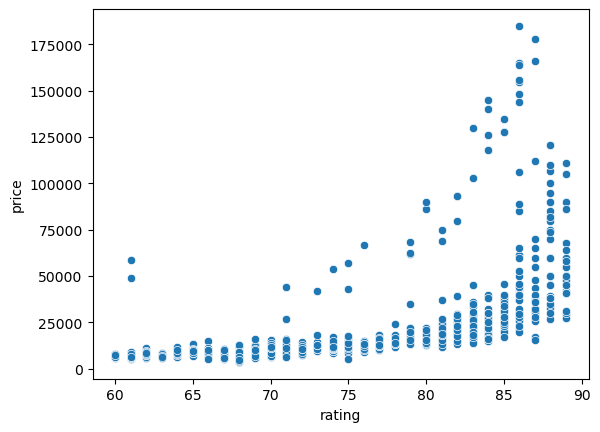

In [550]:
sns.scatterplot(data=df,x='rating',y='price')

<Axes: xlabel='has_5G', ylabel='price'>

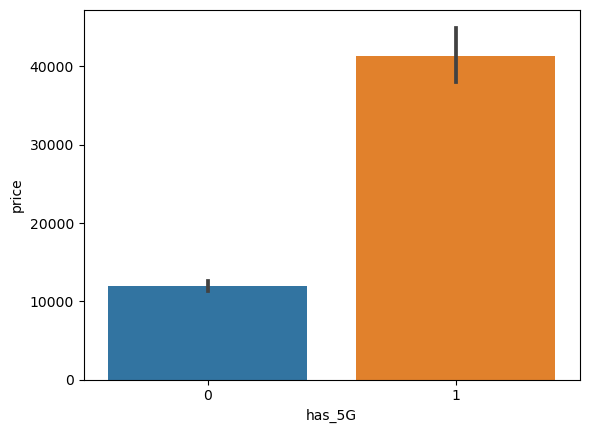

In [551]:
sns.barplot(data=df,x='has_5G',y='price')

<Axes: xlabel='has_5G', ylabel='price'>

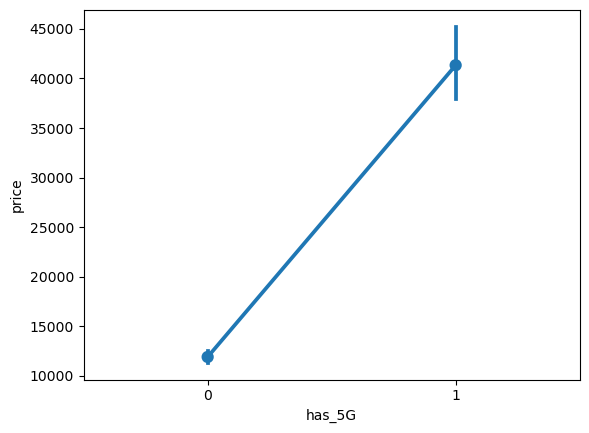

In [552]:
sns.pointplot(data=df,x='has_5G',y='price')

<Axes: xlabel='has_IR_Blaster', ylabel='price'>

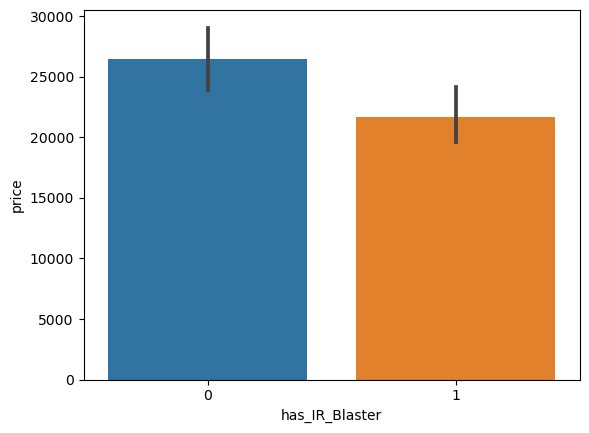

In [553]:
sns.barplot(data=df,x='has_IR_Blaster',y='price')

<Axes: xlabel='has_NFC', ylabel='price'>

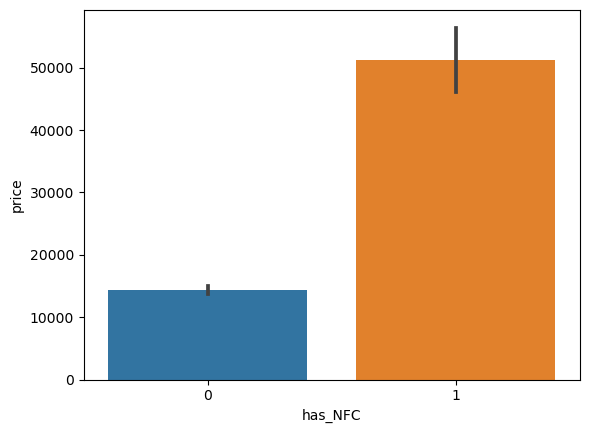

In [554]:
sns.barplot(data=df,x='has_NFC',y='price')

<Axes: xlabel='processor_brand', ylabel='price'>

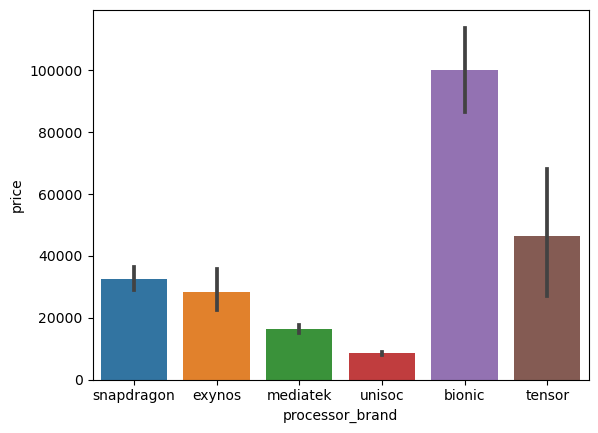

In [555]:
sns.barplot(data=df,x='processor_brand',y='price')

<Axes: xlabel='no_of_cores', ylabel='price'>

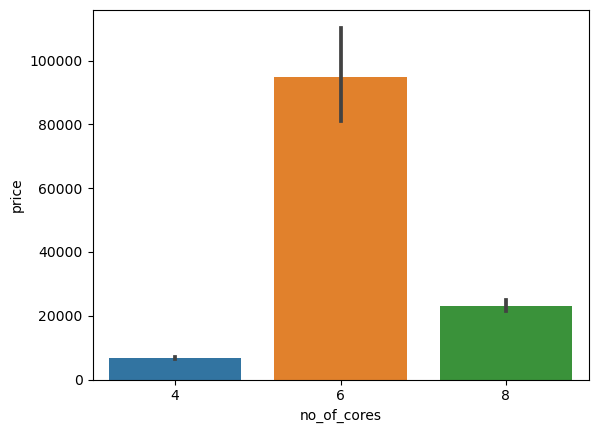

In [556]:
sns.barplot(data=df,x='no_of_cores',y='price')

In [557]:
# hexa core is costly bcoz, iphones are hexa cores

In [558]:
pd.crosstab(df['no_of_cores'],df['operating_system'])

operating_system,Android,iOS
no_of_cores,,
4,49,0
6,2,33
8,612,0


In [559]:
df.head()

,brand_name,model,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,processor_brand,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,resolution,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_rear_camera,primary_front_camera,memory_extended_upto,operating_system,price
0,xiaomi,Xiaomi Redmi 12 5G,75,1,1,0,1,snapdragon,8,2.2,4,128,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,11999
1,xiaomi,Xiaomi Redmi 12 5G (6 GB RAM + 128 GB),77,1,1,0,1,snapdragon,8,2.2,6,128,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,13499
2,xiaomi,Xiaomi Redmi 12 5G (8GB RAM + 256GB),80,1,1,0,1,snapdragon,8,2.2,8,256,1,5000,6.79,Ultra HD,90,2,1,50,8,1024,Android,15499
3,oneplus,OnePlus Nord CE 3 Lite 5G,85,1,1,0,0,snapdragon,8,2.2,8,128,1,5000,6.72,Ultra HD,120,3,1,108,16,1024,Android,19999
4,samsung,Samsung Galaxy F34 5G,83,1,1,1,0,exynos,8,2.4,6,128,1,6000,6.50,Ultra HD,120,3,1,50,13,1024,Android,18999


<Axes: xlabel='processor_speed', ylabel='price'>

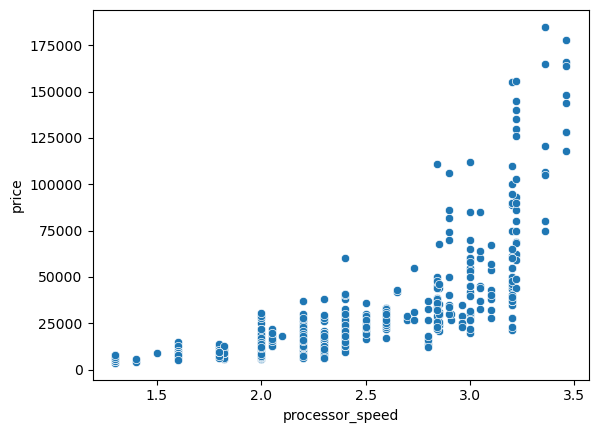

In [560]:
sns.scatterplot(data=df,x='processor_speed',y='price')

<Axes: xlabel='screen_size', ylabel='price'>

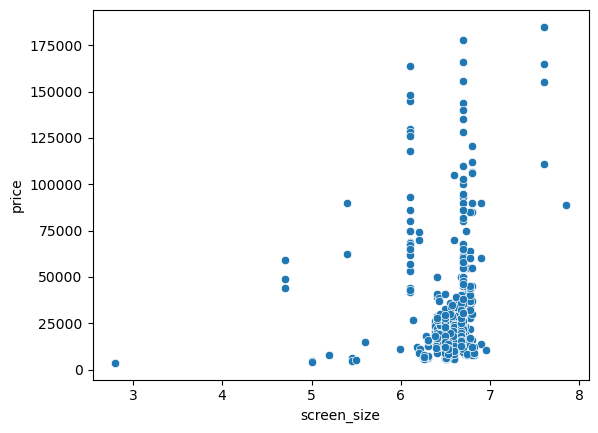

In [561]:
sns.scatterplot(data=df,x='screen_size',y='price')

<Axes: xlabel='ram', ylabel='price'>

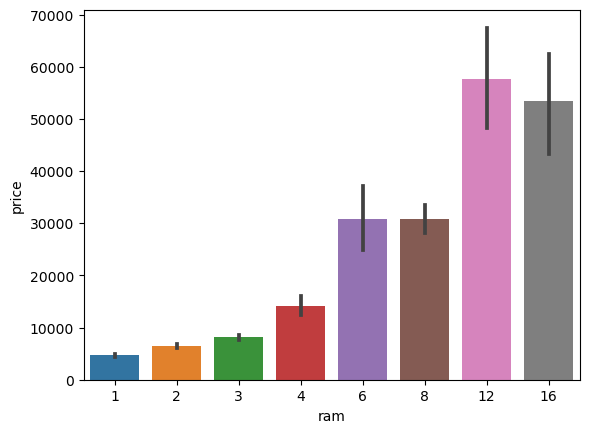

In [562]:
sns.barplot(data=df,x='ram',y='price')

<Axes: xlabel='rom', ylabel='price'>

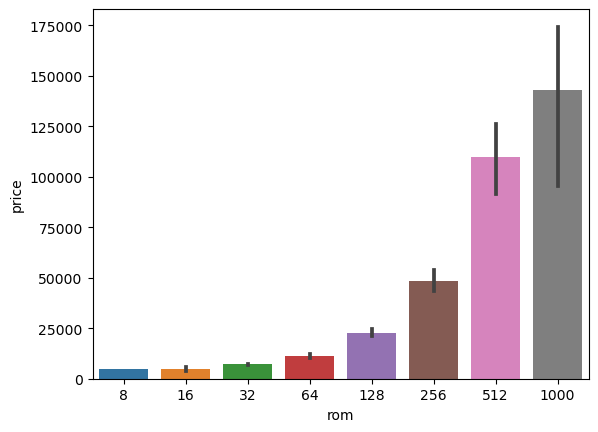

In [563]:
sns.barplot(data=df,x='rom',y='price')

<Axes: xlabel='fast_charging_available', ylabel='price'>

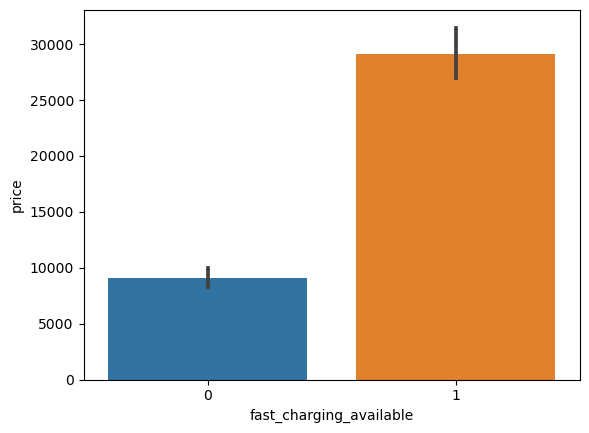

In [564]:
sns.barplot(data=df,x='fast_charging_available',y='price')

<Axes: xlabel='battery_capacity', ylabel='price'>

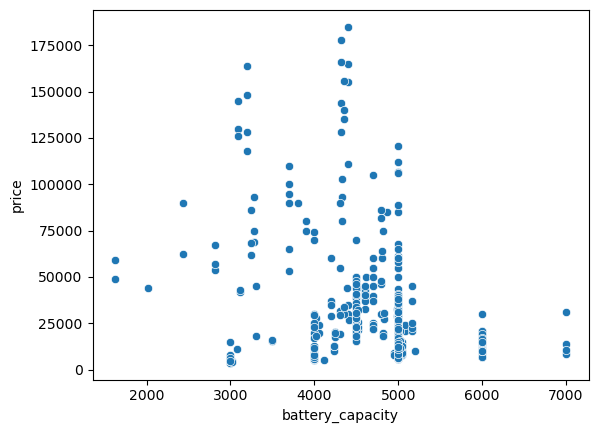

In [565]:
sns.scatterplot(data=df,x='battery_capacity',y='price')

<Axes: xlabel='resolution', ylabel='price'>

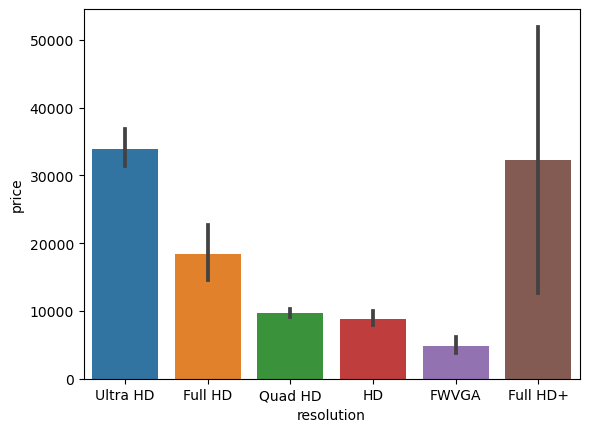

In [566]:
sns.barplot(data=df,x='resolution',y='price')

<Axes: xlabel='refresh_rate', ylabel='price'>

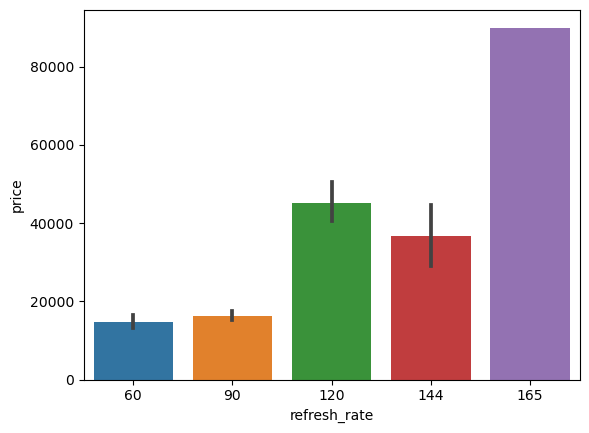

In [567]:
sns.barplot(data=df,x='refresh_rate',y='price')

<Axes: xlabel='no_of_rear_cameras', ylabel='price'>

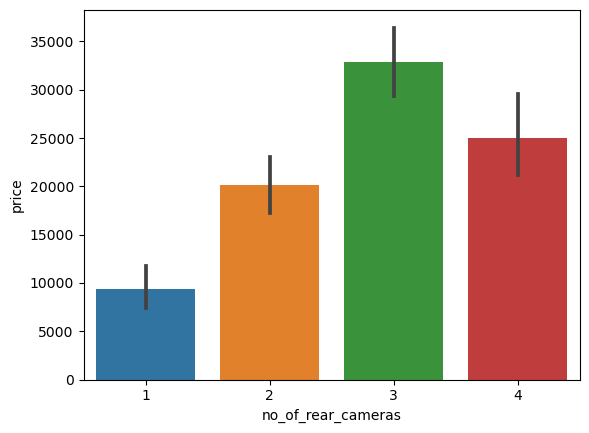

In [568]:
sns.barplot(data=df,x='no_of_rear_cameras',y='price')

<Axes: xlabel='no_of_front_cameras', ylabel='price'>

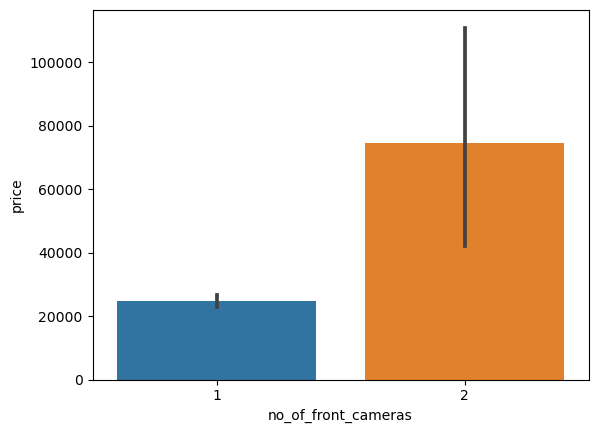

In [569]:
sns.barplot(data=df,x='no_of_front_cameras',y='price')

<Axes: xlabel='primary_rear_camera', ylabel='price'>

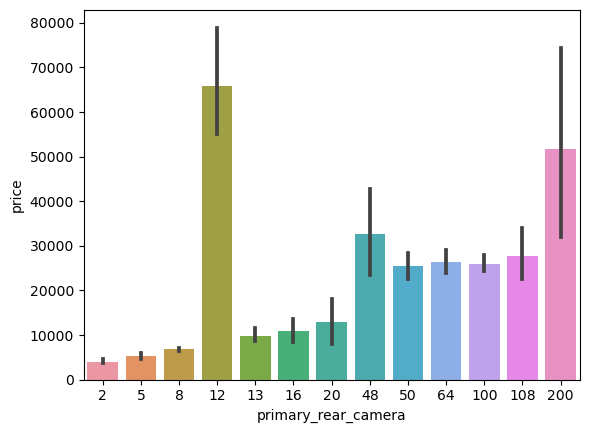

In [570]:
sns.barplot(data=df,x='primary_rear_camera',y='price')

<Axes: xlabel='primary_front_camera', ylabel='price'>

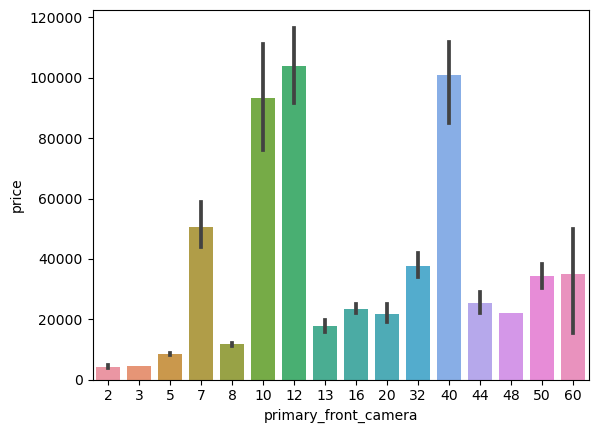

In [571]:
sns.barplot(data=df,x='primary_front_camera',y='price')

<Axes: xlabel='memory_extended_upto', ylabel='price'>

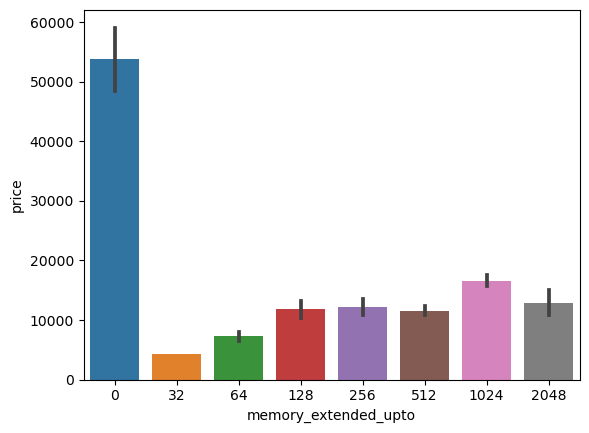

In [572]:
sns.barplot(data=df,x='memory_extended_upto',y='price')

<Axes: xlabel='operating_system', ylabel='price'>

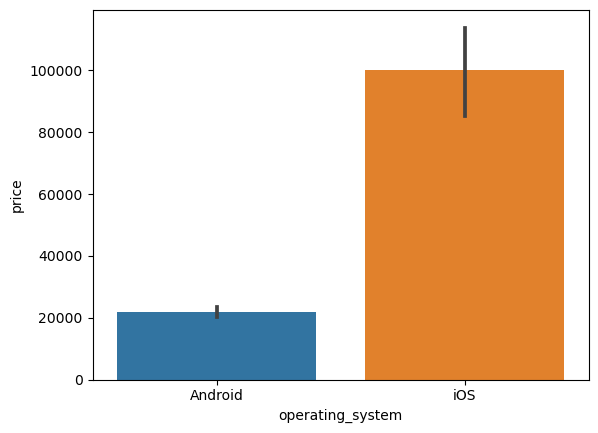

In [573]:
sns.barplot(data=df,x='operating_system',y='price')

In [574]:
df.corr()

C:\Users\Nithin\AppData\Local\Temp\ipykernel_13816\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rating,has_dual_sim,has_5G,has_NFC,has_IR_Blaster,no_of_cores,processor_speed,ram,rom,fast_charging_available,battery_capacity,screen_size,refresh_rate,no_of_rear_cameras,no_of_front_cameras,primary_rear_camera,primary_front_camera,memory_extended_upto,price
rating,1.000000,-0.050556,0.713249,0.556287,0.200567,0.353499,0.711293,0.807047,0.555507,0.594685,-0.084548,0.263696,0.764632,0.572804,0.123415,0.611677,0.651397,-0.152521,0.550303
has_dual_sim,-0.050556,1.000000,-0.043589,-0.115267,0.035919,-0.026732,-0.085786,-0.024159,-0.083795,-0.035399,0.132757,0.018030,-0.046883,0.080373,0.010070,0.060059,-0.005334,0.079026,-0.146367
has_5G,0.713249,-0.043589,1.000000,0.539559,0.089972,0.162859,0.675518,0.600468,0.480578,0.418213,-0.183840,0.144018,0.712800,0.208627,0.031673,0.388880,0.422784,-0.200816,0.531300
has_NFC,0.556287,-0.115267,0.539559,1.000000,-0.133555,0.042105,0.626638,0.478058,0.451104,0.274425,-0.267960,0.047184,0.487608,0.151320,0.032710,0.149977,0.349944,-0.311869,0.612632
has_IR_Blaster,0.200567,0.035919,0.089972,-0.133555,1.000000,0.166111,0.078519,0.141894,-0.000667,0.200524,0.108628,0.126173,0.181628,0.285264,-0.033998,0.235454,0.045201,-0.009270,-0.066337
no_of_cores,0.353499,-0.026732,0.162859,0.042105,0.166111,1.000000,0.218977,0.308257,0.032793,0.388995,0.309721,0.378439,0.280212,0.380323,0.046571,0.373557,0.238843,0.228437,-0.055896
processor_speed,0.711293,-0.085786,0.675518,0.626638,0.078519,0.218977,1.000000,0.623541,0.580860,0.463120,-0.265719,0.188905,0.620277,0.340361,0.125744,0.291627,0.436278,-0.400832,0.733516
ram,0.807047,-0.024159,0.600468,0.478058,0.141894,0.308257,0.623541,1.000000,0.533396,0.422271,-0.014315,0.342891,0.664180,0.413219,0.180417,0.498846,0.576406,-0.244107,0.461043
rom,0.555507,-0.083795,0.480578,0.451104,-0.000667,0.032793,0.580860,0.533396,1.000000,0.299791,-0.203281,0.167430,0.451725,0.216914,0.179165,0.246288,0.294049,-0.273495,0.750807
fast_charging_available,0.594685,-0.035399,0.418213,0.274425,0.200524,0.388995,0.463120,0.422271,0.299791,1.000000,0.138288,0.273907,0.457939,0.456559,0.061670,0.439902,0.346553,0.073729,0.277459


C:\Users\Nithin\AppData\Local\Temp\ipykernel_13816\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

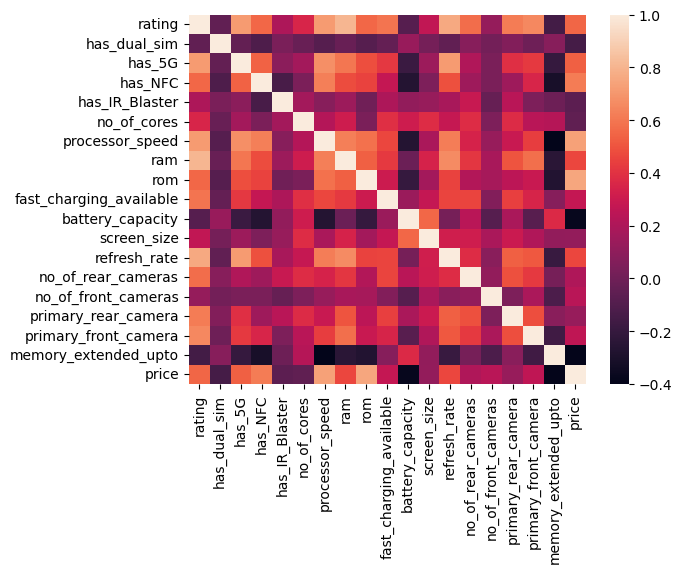

In [575]:
sns.heatmap(df.corr())

In [576]:
df.corr()['price']

C:\Users\Nithin\AppData\Local\Temp\ipykernel_13816\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


rating                     0.550303
has_dual_sim              -0.146367
has_5G                     0.531300
has_NFC                    0.612632
has_IR_Blaster            -0.066337
no_of_cores               -0.055896
processor_speed            0.733516
ram                        0.461043
rom                        0.750807
fast_charging_available    0.277459
battery_capacity          -0.378652
screen_size                0.113674
refresh_rate               0.463456
no_of_rear_cameras         0.203359
no_of_front_cameras        0.235361
primary_rear_camera        0.127789
primary_front_camera       0.258293
memory_extended_upto      -0.390818
price                      1.000000
Name: price, dtype: float64

In [577]:
df.corr()['rating']

C:\Users\Nithin\AppData\Local\Temp\ipykernel_13816\2193793502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['rating']


rating                     1.000000
has_dual_sim              -0.050556
has_5G                     0.713249
has_NFC                    0.556287
has_IR_Blaster             0.200567
no_of_cores                0.353499
processor_speed            0.711293
ram                        0.807047
rom                        0.555507
fast_charging_available    0.594685
battery_capacity          -0.084548
screen_size                0.263696
refresh_rate               0.764632
no_of_rear_cameras         0.572804
no_of_front_cameras        0.123415
primary_rear_camera        0.611677
primary_front_camera       0.651397
memory_extended_upto      -0.152521
price                      0.550303
Name: rating, dtype: float64